In [75]:
#Importing the required Libraries
import pandas as pd
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import re
#plt.rcParams['figure.figsize'] = (16, 8)
#plt.style.use('fivethirtyeight')
# import warnings
# warnings.filterwarnings('ignore')

In [77]:
a=pd.read_csv("autolist/autolist.csv")
b=pd.read_csv("carconnection/carconnection.csv")
df=pd.concat([a,b],ignore_index=True)
df=df.drop_duplicates(subset=['VIN'], keep=False)
df=df.rename(columns={'title':'Title'})
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
def fixTitle(title):
    if not pd.isnull(title):
        return title.partition('\n')[0]
    else:
        return title
df['Title']=df['Title'].apply(fixTitle).astype(pd.StringDtype())
df

,price,mileage,Trim,Transmission,Engine,Drivetrain,VIN,Fuel Type,Exterior Color,Interior Color,Condition,Mileage,Gas Mileage,Body Style,Doors,Stock #,Cabin,Bed,Rear Wheel,Title
0,"$3,499","170,704 miles",Limited,automatic,3.8L V6 SFI Series II,FWD,1G4HR54KX1U141777,NaN,Titanium Blue Metallic,Medium Gray,used,170704.0,NaN,sedan,NaN,T6381PA,NaN,NaN,NaN,2001 BUICK LeSabre
1,"$3,900","195,929 miles",BASE 4DR SEDAN,automatic,Gasoline Fuel,FWD,2G1WF52E339207323,NaN,Sandrift Metallic,Neutral,used,195929.0,NaN,sedan,NaN,39207323A,NaN,NaN,NaN,2003 CHEVROLET Impala
2,"$4,995","192,734 miles",SE Sedan 4D,automatic,"V6, 3.0 Liter",FWD,1FAFP53U84G107348,NaN,Red,Gray,used,192734.0,NaN,sedan,NaN,107348,NaN,NaN,NaN,2004 FORD Taurus
3,"$4,100","146,953 miles",LT w/2LT,automatic,2.4L 4 Cylinder Engine,FWD,1G1ZJ57BX9F230088,NaN,Imperial Blue Metallic,Cocoa/Cashmere,used,146953.0,NaN,sedan,NaN,9F230088TS,NaN,NaN,NaN,2009 CHEVROLET Malibu
4,"$3,995","181,061 miles",NaN,automatic,42.0L,FWD,1FAFP34N37W147214,NaN,Blue,NaN,used,181061.0,NaN,hatchback,NaN,F24026B2,NaN,NaN,NaN,2007 FORD Focus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19866,"$25,589","26,683 miles",Ti,automatic,2.0L I4 F SOHC 16V TURBOCHARGED,AWD,ZASPAKBNXK7C37435,gasoline,Black,Black,used,26683.0,22 city / 28 hwy,wagon,4.0,PK7C37435,NaN,NaN,NaN,2019 Alfa Romeo Stelvio Ti
19867,"$35,500",89 miles,Veloce,automatic,I4,AWD,ZASPAKBN3N7D47683,NaN,White,Black,used,89.0,NaN,suv,NaN,PV18111A,NaN,NaN,NaN,2022 Alfa Romeo Stelvio Veloce
19868,"$30,536","21,948 miles",Ti Sport Carbon,automatic,Intercooled Turbo Premium Unleaded I-4 2.0 L/122,RWD,ZARFAMBN2L7626416,NaN,Red,Black,used,21948.0,NaN,sedan,NaN,T64471,NaN,NaN,NaN,2020 Alfa Romeo Giulia Ti Sport Carbon
19869,"$25,957","31,237 miles",Ti,automatic,I4,AWD,ZASPAKBN7L7C91101,NaN,Stromboli Gray Metallic,Red/Black,used,31237.0,NaN,suv,NaN,NU1947,NaN,NaN,NaN,2020 Alfa Romeo Stelvio Ti


In [78]:
df.drop(["Stock #","Fuel Type"],axis=1,inplace=True)
df["Doors"]=df["Doors"].apply(lambda x:4 if pd.isna(x) else x).astype(pd.Int64Dtype())
df['price'] = df['price'].str.replace(re.compile('(\$|,)+'), '',regex=True)\
                .astype('str').astype(int)
df['mileage'] = df['mileage'].str.replace(re.compile('(miles| |,)+'), '',regex=True)\
                .astype('str').astype(float)
df['Title']=df['Title'].replace("  ",np.nan)
df.dropna(subset=["Title"],inplace=True)

In [79]:
mil_diff=df[abs(df['mileage']-df['Mileage'])>0.00001]
print(f"Number of instances with incoherent mileage: {len(mil_diff)}/{len(df)}")
print("Removed these instances.")
df=df[abs(df['mileage']-df['Mileage'])<0.00001]
df=df.drop('mileage',axis=1)

Number of instances with incoherent mileage: 10/19788
Removed these instances.


In [80]:
print(df.columns)

Index(['price', 'Trim', 'Transmission', 'Engine', 'Drivetrain', 'VIN',
       'Exterior Color', 'Interior Color', 'Condition', 'Mileage',
       'Gas Mileage', 'Body Style', 'Doors', 'Cabin', 'Bed', 'Rear Wheel',
       'Title'],
      dtype='object')


Number of Missing Values in our data set



,Variable,Missing Values
0,price,0
1,Trim,466
2,Transmission,144
3,Engine,630
4,Drivetrain,492
5,VIN,0
6,Exterior Color,447
7,Interior Color,2173
8,Condition,0
9,Mileage,0



 Percentage of Missing Values in our data set


,Count
price,0.000000
Trim,2.376945
Transmission,0.734507
Engine,3.213466
Drivetrain,2.509564
VIN,0.000000
Exterior Color,2.280031
Interior Color,11.083907
Condition,0.000000
Mileage,0.000000


Text(0.5, 1.0, 'Percentage of Missing values')

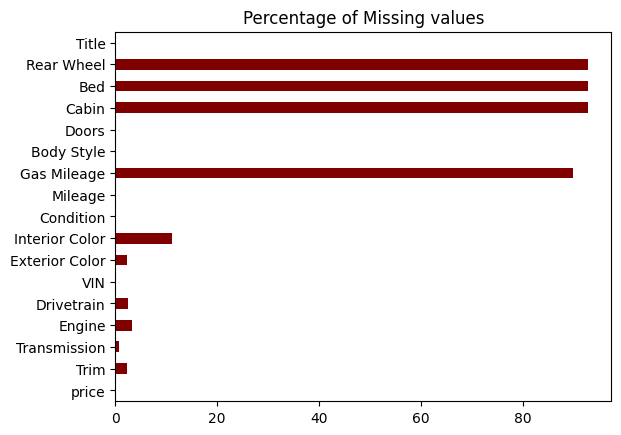

In [81]:
print("Number of Missing Values in our data set\n")
missing_df = df.isnull().sum().to_frame().reset_index().rename({"index" : 'Variable', 0: 'Missing Values'}, axis =1)
display(missing_df.style.background_gradient('gnuplot2_r'))
print("\n Percentage of Missing Values in our data set")
display((df.isnull().sum() / (len(df.index)) * 100).head(20).to_frame().rename({0:'Count'}, axis = 1).style.background_gradient('gnuplot2_r'))
round((df.isnull().sum() / (len(df.index)) * 100) , 2).plot(kind = 'barh',color ='maroon')

plt.title("Percentage of Missing values")

In [82]:
print(df[~pd.isna(df["Gas Mileage"])].iloc[0])
print(df.info())

price                               2995
Trim                                  GS
Transmission                   automatic
Engine            V6, Supercharged, 3.8L
Drivetrain                           FWD
VIN                    2G4WF551521198519
Exterior Color                     White
Interior Color                      Gray
Condition                           used
Mileage                         227653.0
Gas Mileage             16 city / 25 hwy
Body Style                         sedan
Doors                                  4
Cabin                                NaN
Bed                                  NaN
Rear Wheel                           NaN
Title                   2002 BUICK Regal
Name: 605, dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 19605 entries, 0 to 19870
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           19605 non-null  int64  
 1   Trim            19139 non-null  ob

In [83]:
trimview=df['Trim'].value_counts().reset_index(name='counts')
trimview[trimview['counts']>100]

,Trim,counts
0,Base,899
1,Ti,419
2,xDrive28i,418
3,Limited,391
4,Sport,336
5,LT,322
6,Competition,282
7,SE,250
8,Premium,230
9,sDrive28i,228


Condition
used                   18682
certified pre-owned      918
new                        5
Name: count, dtype: int64


<Axes: ylabel='count'>

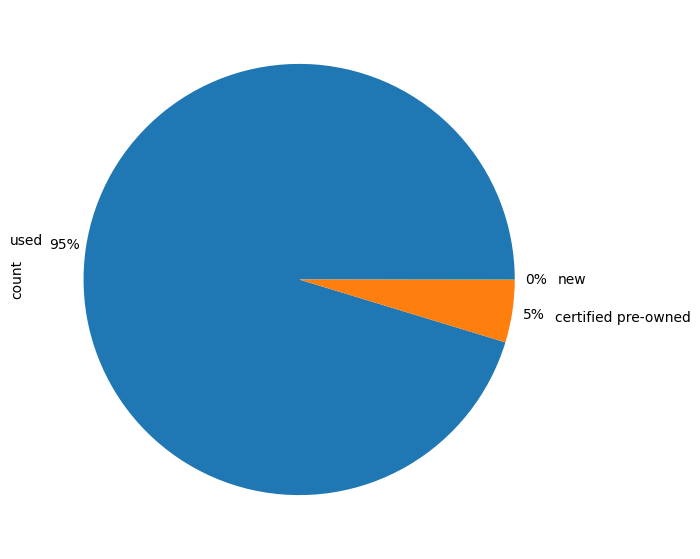

In [84]:
temp=df['Condition'].value_counts()
print(temp)
temp.plot.pie(y='Condition', figsize=(10, 7),autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

<Axes: xlabel='Year', ylabel='count'>

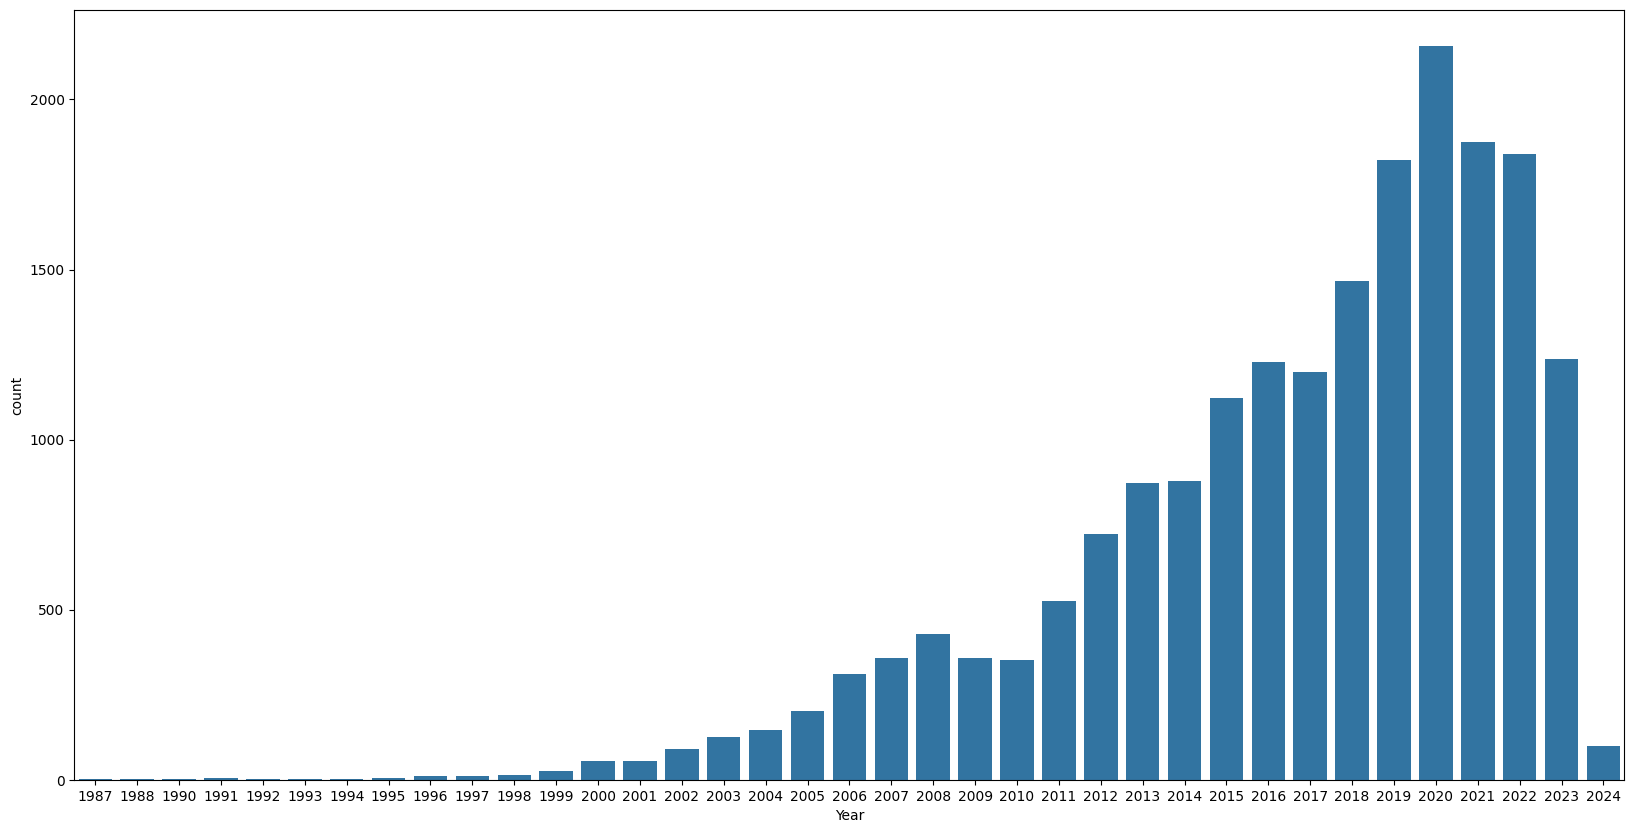

In [85]:
titleview=df[~pd.isna(df["Title"])][["Title","price"]]
titleview["Year"]=titleview["Title"].apply(lambda x: re.findall('\d+', x)[0]).astype(pd.Int16Dtype())
titleview["Brand"]=titleview["Title"].apply(lambda x: re.findall('[^ ]+', x)[1]).astype(pd.StringDtype())
titleview["Make"]=titleview["Title"].apply(lambda x: re.findall('[^ ]+', x)[2]).astype(pd.StringDtype())
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(data=titleview,x="Year")

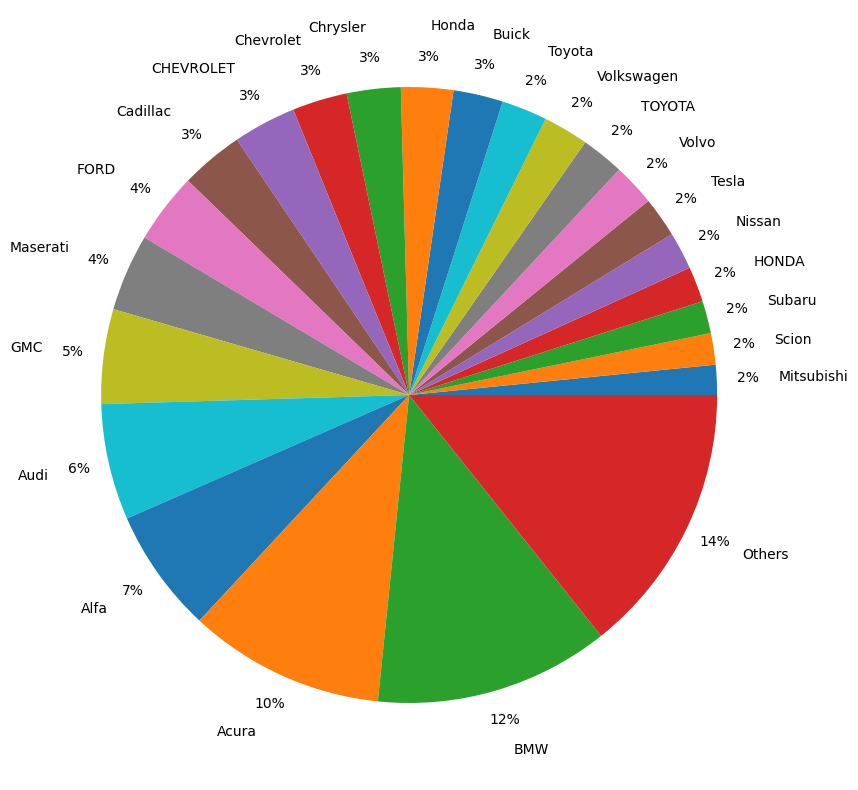

In [93]:
temp=titleview['Brand'].value_counts().reset_index()
temp.loc[temp['count'] < 300, 'Brand'] = 'Others'
temp = temp.groupby('Brand')['count'].sum().reset_index().sort_values(by=["count"])
fig, ax = plt.subplots(figsize=(20,10))
_=plt.pie(labels=temp['Brand'],x=temp["count"],autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

/tmp/ipykernel_455840/2755600041.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pricechangeview["Year"]=pricechangeview["Year"].apply(lambda x: max(YEAR-x,0))


<Axes: xlabel='Year'>

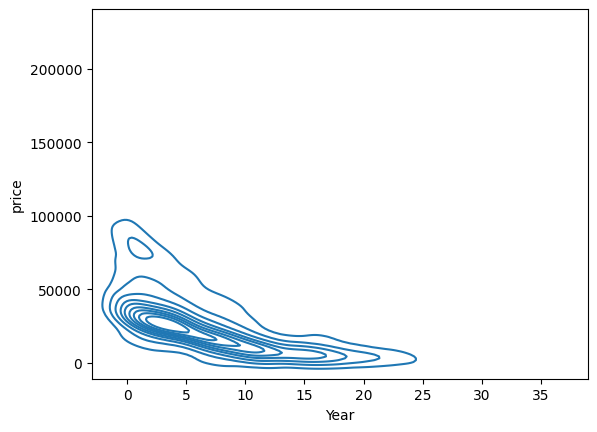

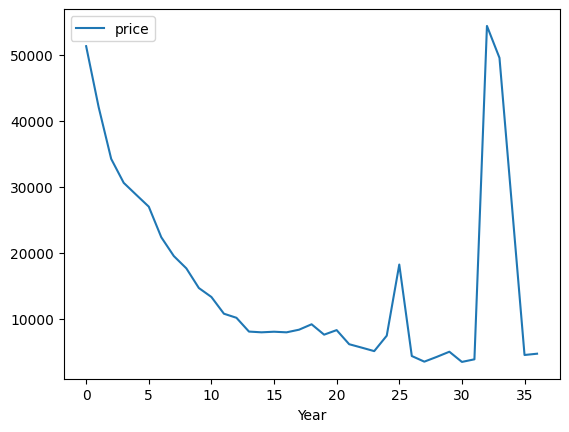

In [123]:
from datetime import datetime
pricechangeview=titleview[["Year","price"]]
YEAR=datetime.now().year
pricechangeview["Year"]=pricechangeview["Year"].apply(lambda x: max(YEAR-x,0))
temp=pricechangeview.__deepcopy__()
sns.kdeplot(temp,x="Year",y="price")
temp=temp.groupby(by="Year",as_index=False).mean()
temp.plot.line(x="Year",y="price")

In [118]:
print(pricechangeview[(pricechangeview["Year"]>20) & (pricechangeview["price"]>30000)])

       Year   price
6407     25   32980
6625     32   89977
7512     25   96900
8539     21   43900
8842     22   42500
9219     21   49990
9653     32  169995
9959     25   34500
10405    33  103950
12752    24   49995
